# Closing Price Prediction with ARIMA

In [95]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.tools import diff
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
import matplotlib.pyplot as plt
import mplfinance as mpf

## Data Preparation

In [96]:
DATA_DIR = "../../data"
stocks = pd.read_csv(os.path.join(DATA_DIR, "stocks.csv"), index_col=0, parse_dates=True)
stocks.index = pd.DatetimeIndex(stocks.index).to_period("D")
apple = stocks[stocks["Company"] == "AAPL"]
closing = apple["Close"]
apple.head()

,Company,Sector,Open,High,Low,Close,Volume
Date,,,,,,,
2017-11-02,AAPL,Technology,41.650002,42.125000,41.320000,42.027500,165573600
2017-11-03,AAPL,Technology,43.500000,43.564999,42.779999,43.125000,237594400
2017-11-06,AAPL,Technology,43.092499,43.747501,42.930000,43.562500,140105200
2017-11-07,AAPL,Technology,43.477501,43.812500,43.400002,43.702499,97446000
2017-11-08,AAPL,Technology,43.665001,44.060001,43.582500,44.060001,97638000


### Training and Test Datasets

In [97]:
test_size = 0.1
split = int(len(closing) * (1 - test_size))
closing_train = closing[:split]
closing_test = closing[split:]

## Model Specification

### Original Series

#### ACF

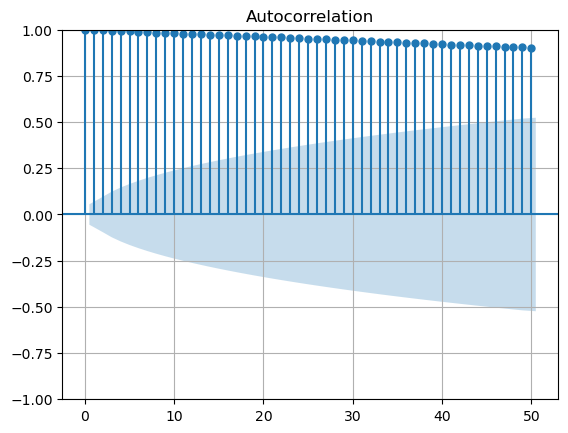

In [98]:
plot_acf(closing, lags=50)
plt.grid()
plt.show()

It is not suitable to fit an MA model. And the original series may not be stationary. We need to consider either an AR model or its differences.

#### PACF

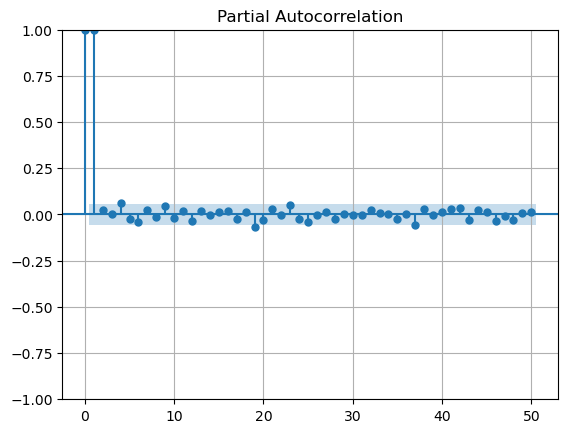

In [99]:
plot_pacf(closing, method="ywm", lags=50)
plt.grid()
plt.show()

It seems reasonable to assume an AR(1) model.

### Differenced Series

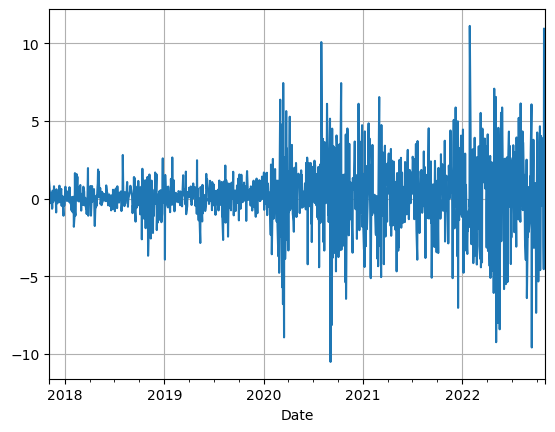

In [100]:
d_closing = diff(closing)
d_closing.plot()
plt.grid()
plt.show()

#### ACF

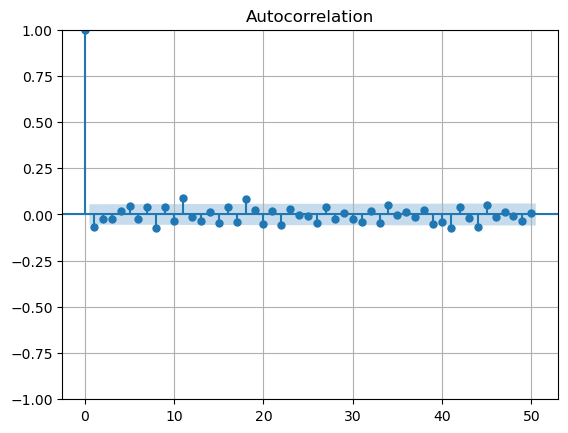

In [101]:
plot_acf(d_closing, lags=50)
plt.grid()
plt.show()

ARIMA(0, 1, 18)

#### PACF

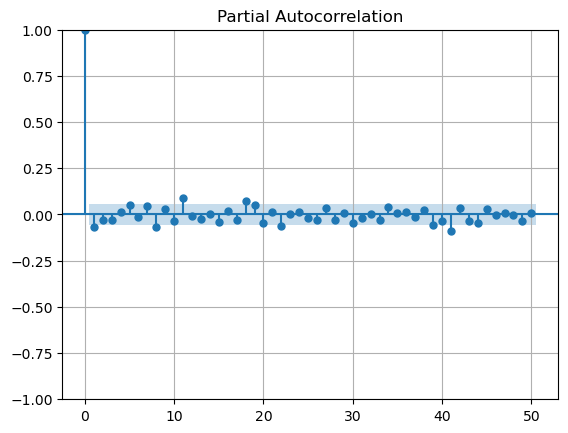

In [102]:
plot_pacf(d_closing, method="ywm", lags=50)
plt.grid()
plt.show()

ARIMA(18, 1, 0)

### Candidate Models

1. ARIMA(1, 0, 0)
2. ARIMA(0, 1, 18)
3. ARIMA(18, 1, 0)

## Model Fitting

In [105]:
arima_1_0_0 = ARIMA(closing_train, order=(1, 0, 0)).fit()
arima_0_1_18 = ARIMA(closing_train, order=(0, 1, 18)).fit()
arima_18_1_0 = ARIMA(closing_train, order=(18, 1, 0)).fit()

In [125]:
arima_1_0_0.predict(start="2022-05-04", end=closing_test.index[:3][-1])

2022-05-04    149.456474
2022-05-05    149.438392
2022-05-06    149.420316
Freq: D, Name: predicted_mean, dtype: float64

In [124]:
closing_test.index[:3][-1]

Period('2022-05-06', 'D')

In [126]:
closing_test

Date
2022-05-04    166.020004
2022-05-05    156.770004
2022-05-06    157.279999
2022-05-09    152.059998
2022-05-10    154.509995
                 ...    
2022-10-26    149.350006
2022-10-27    144.800003
2022-10-28    155.740005
2022-10-31    153.339996
2022-11-01    150.649994
Freq: D, Name: Close, Length: 126, dtype: float64